In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle


In [8]:
df = pd.read_csv("/content/train.csv")

In [9]:
df.shape

(800, 22)

In [10]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [11]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [12]:
pd.set_option('display.max_columns', None)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [14]:
df["age"] =df["age"].astype(int)

In [15]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [16]:
for col in df.columns:
  numerical_feature =["ID","age", "result"]
  if col not in numerical_feature:
    print(f"{col} : {df[col].unique()}")
    print("-"*50)

A1_Score : [1 0]
--------------------------------------------------
A2_Score : [0 1]
--------------------------------------------------
A3_Score : [1 0]
--------------------------------------------------
A4_Score : [0 1]
--------------------------------------------------
A5_Score : [1 0]
--------------------------------------------------
A6_Score : [0 1]
--------------------------------------------------
A7_Score : [1 0]
--------------------------------------------------
A8_Score : [0 1]
--------------------------------------------------
A9_Score : [1 0]
--------------------------------------------------
A10_Score : [1 0]
--------------------------------------------------
gender : ['f' 'm']
--------------------------------------------------
ethnicity : ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice : ['no' 'yes']
-------------------------------

In [17]:
df= df.drop(columns=["ID","age_desc"])

In [18]:
df.shape

(800, 20)

In [19]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [20]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [21]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [22]:
mapping ={"Viet Nam": "Vietnam","AmericanSamoa": "United States","Hong Kong":"China"}
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [23]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [24]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


In [25]:
df.shape

(800, 20)

In [26]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [27]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


df.describe()

Mean: 27.96375
Median: 24.0


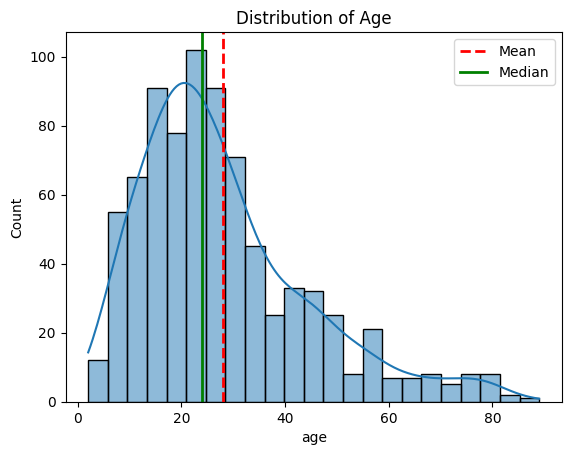

In [28]:
sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")
age_mean = df["age"].mean()
age_median = df["age"].median()
print(f"Mean: {age_mean}")
print(f"Median: {age_median}")
plt.axvline(age_mean, color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(age_median, color='green', linestyle='-', linewidth=2, label='Median')
plt.legend()
plt.show()

plt.show()

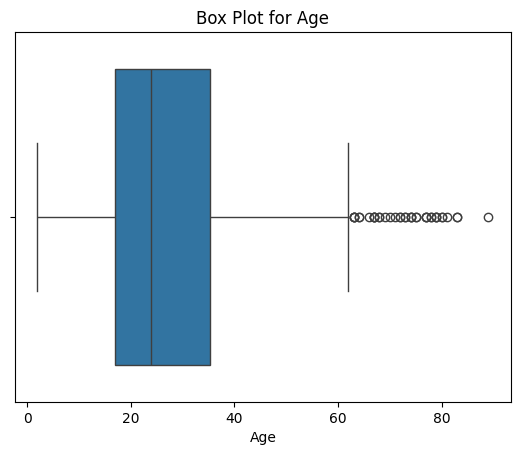

In [29]:
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

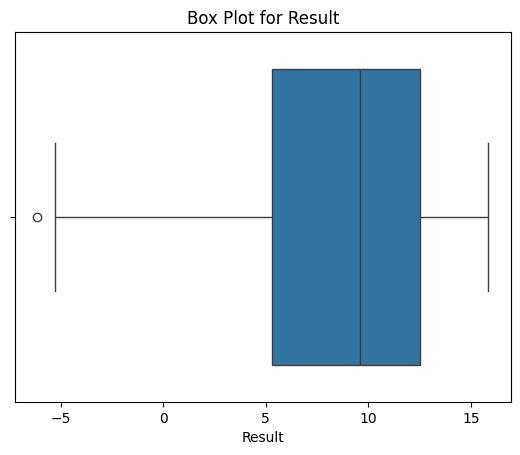

In [30]:
sns.boxplot(x=df["result"])
plt.title("Box Plot for Result")
plt.xlabel("Result")
plt.show()

In [31]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

In [32]:
len(age_outliers)

39

In [33]:
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [34]:
len(age_outliers)

1

In [35]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

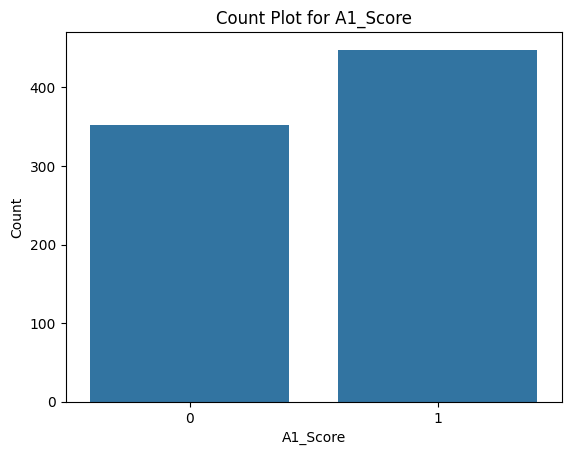

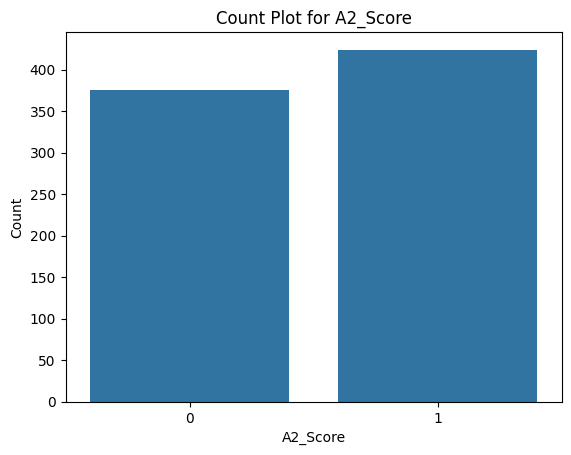

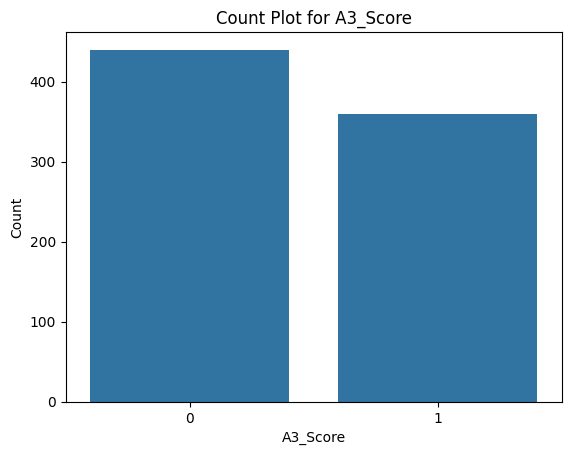

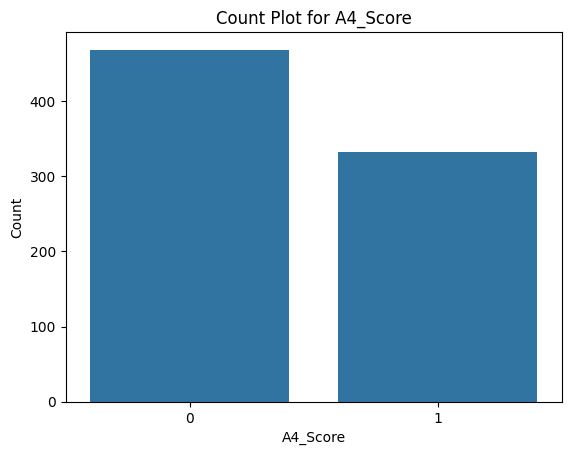

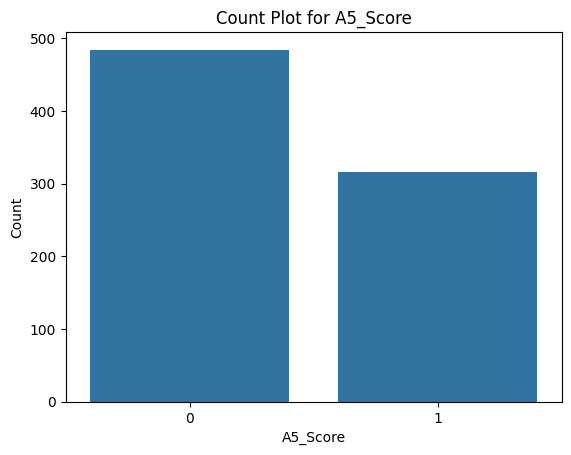

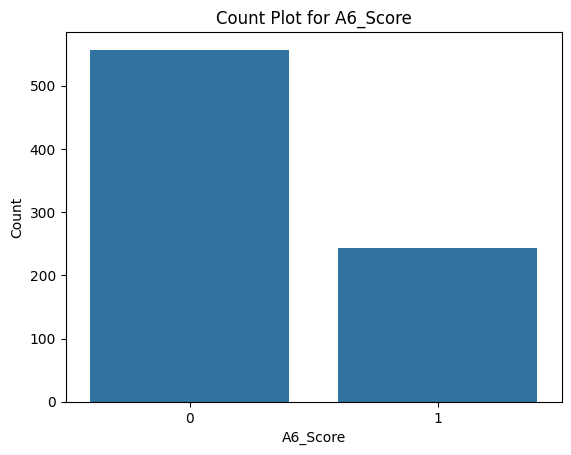

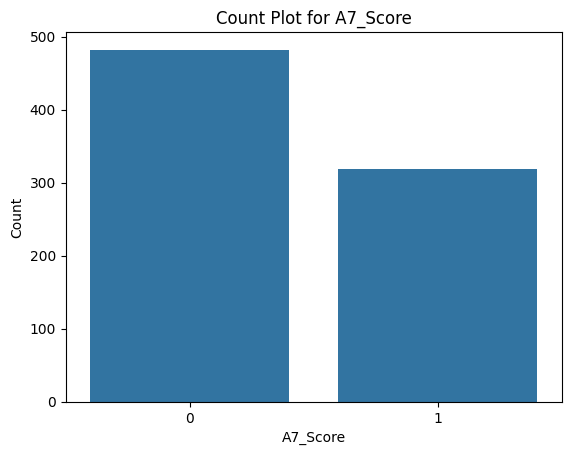

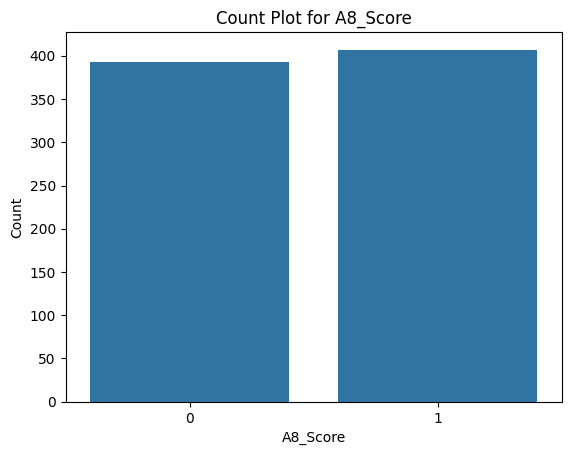

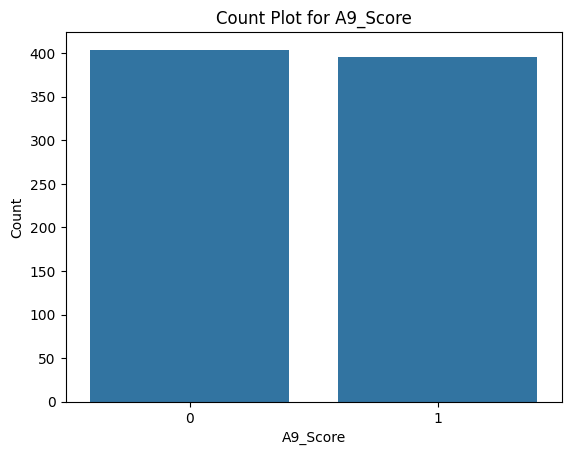

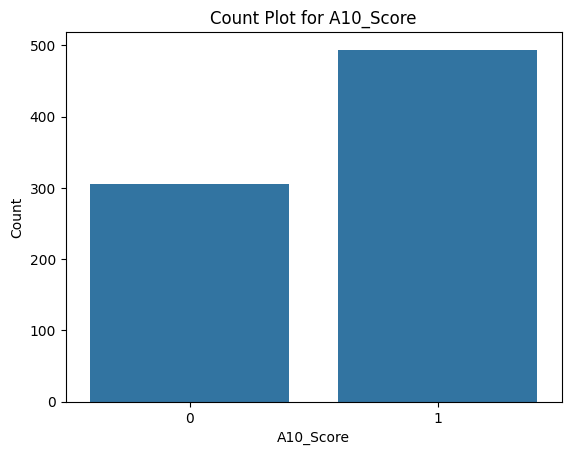

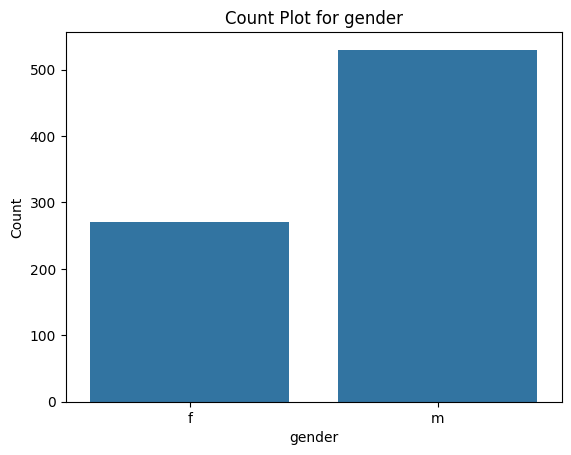

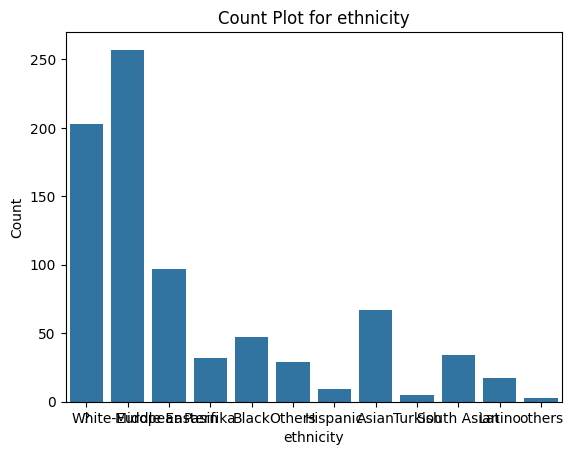

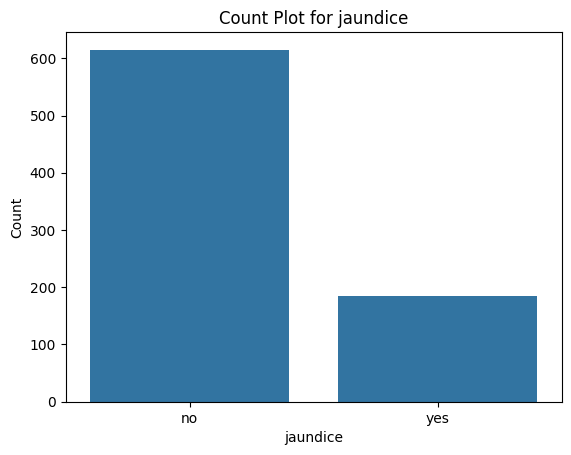

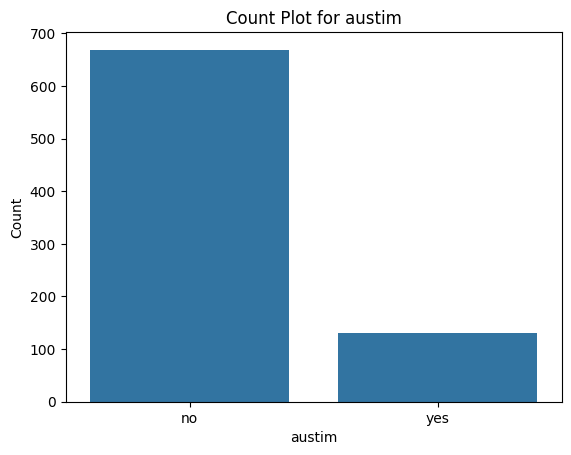

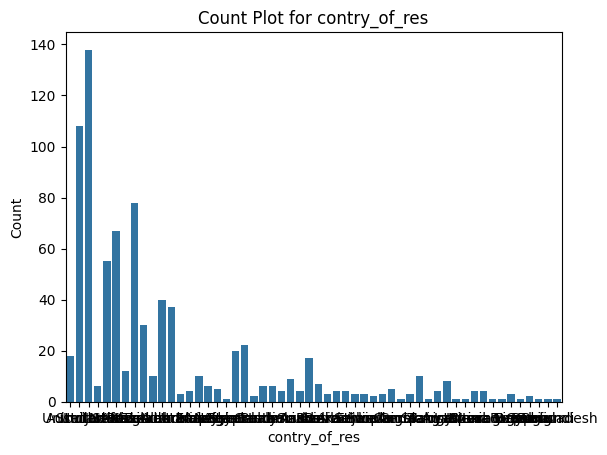

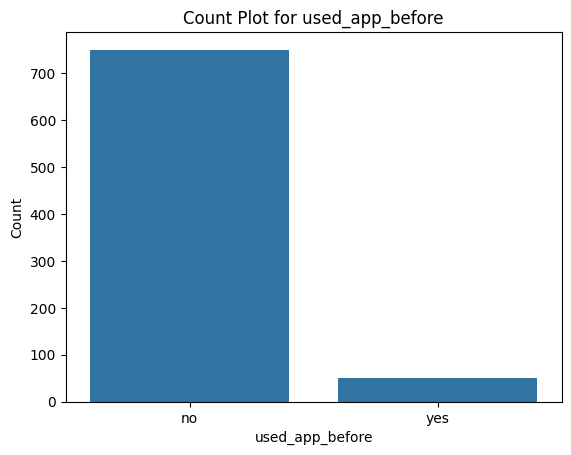

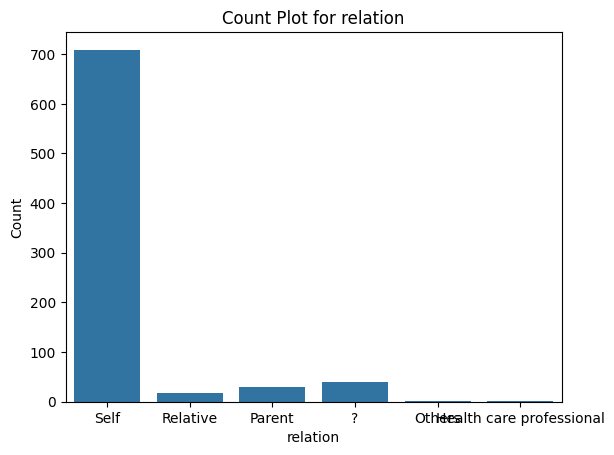

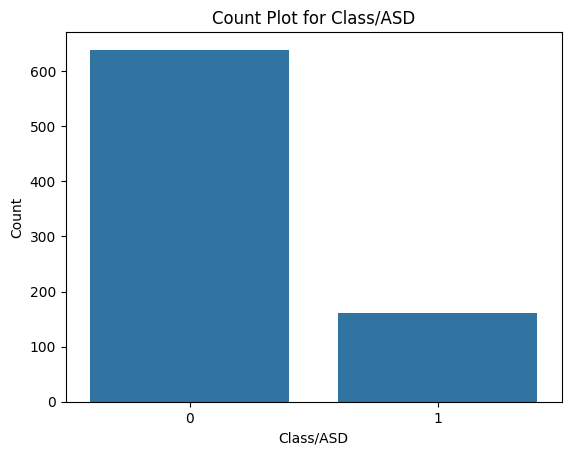

In [36]:
sns.categorical_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation', 'Class/ASD']
for col in sns.categorical_columns:
  sns.countplot(x = df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()


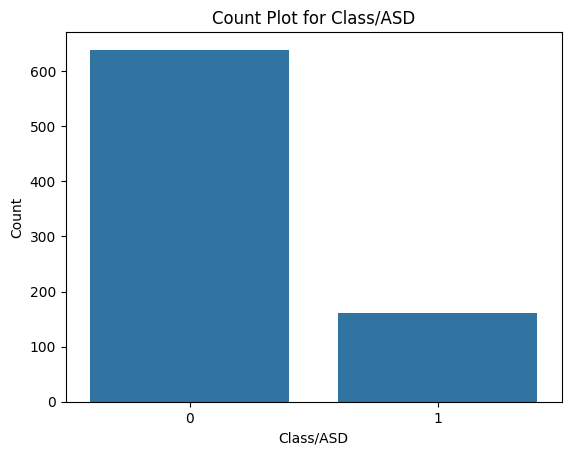

In [37]:
sns.countplot(x= df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [38]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


In [39]:
df["ethnicity"] = df["ethnicity"].replace({"?": "others","others":"others"})

In [40]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [41]:
df["relation"]=df["relation"].replace(
    {"?":"others",
     "Relative":"others",
     "Parent":"others",
     "Health care professional":"others",
     }

)

In [42]:
df["relation"].unique()

array(['Self', 'others', 'Others'], dtype=object)

In [43]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,others,no,no,South Africa,no,-4.777286,Self,0


In [44]:
object_columns = df.select_dtypes(include =["object"]).columns

In [45]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [46]:
encoders = {}
for column in object_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))  # cast to string
    encoders[column] = le

with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [47]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [48]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,10,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,10,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,10,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,10,0,0,44,0,-4.777286,1,0


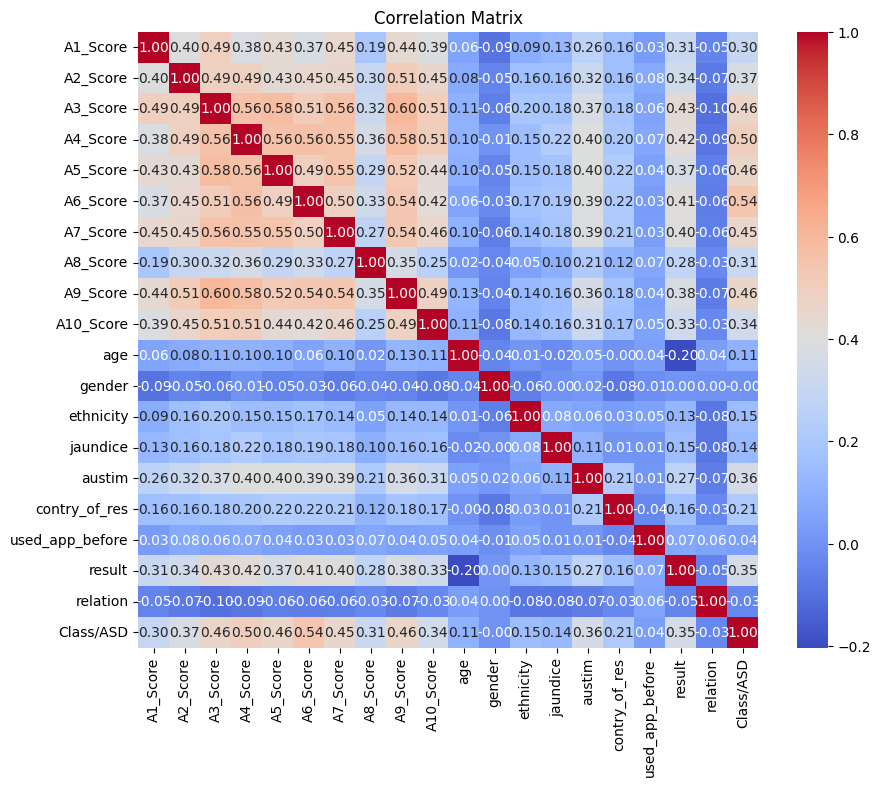

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [50]:
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df

In [51]:
df = replace_outliers_with_median( df,"age")
df = replace_outliers_with_median( df,"result")

In [52]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,10,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,10,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,10,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,10,0,0,44,0,-4.777286,1,0


In [53]:
df.shape

(800, 20)

In [54]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [55]:
x = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

In [56]:
print(x)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [57]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [60]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


In [61]:
smote = SMOTE(random_state=42)

In [62]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [63]:
print(y_train_smote.shape)

(1030,)


In [64]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


In [65]:
models ={"Decision Tree": DecisionTreeClassifier(random_state=42),
         "Random Forest": RandomForestClassifier(random_state=42),
         "XGBoost": XGBClassifier(random_state=42)}

In [66]:
print(models)

{'Decision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)}


In [67]:
cv_scores ={}
for model_name, model in models.items():
  print(f"Training{model_name} with default parametres...")
  scores= cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
  print("-"*50)


TrainingDecision Tree with default parametres...
Decision Tree Cross-Validation Accuracy: 0.86
--------------------------------------------------
TrainingRandom Forest with default parametres...
Random Forest Cross-Validation Accuracy: 0.92
--------------------------------------------------
TrainingXGBoost with default parametres...
XGBoost Cross-Validation Accuracy: 0.91
--------------------------------------------------


In [68]:
cv_scores

{'Decision Tree': array([0.80582524, 0.86407767, 0.88349515, 0.88834951, 0.8592233 ]),
 'Random Forest': array([0.90776699, 0.94660194, 0.90776699, 0.90776699, 0.91262136]),
 'XGBoost': array([0.86407767, 0.94660194, 0.91262136, 0.9223301 , 0.90776699])}

In [69]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)

In [70]:
#hyperparameters grids for RandomizedSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20,30,50,70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True,False]
}
param_grid_xgb = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'coolsample_bytree': [0.8, 0.9, 1.0]
}

In [73]:
#HYPERPARAMETER TUNING
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost, param_distributions = param_grid_xgb, n_iter=20, cv=5, scoring='accuracy', random_state=42)

In [75]:
random_search_dt.fit(x_train_smote, y_train_smote)
random_search_rf.fit(x_train_smote, y_train_smote)
random_search_xgb.fit(x_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'coolsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy')

In [78]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)
print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

DecisionTreeClassifier(max_depth=70, random_state=42)
0.8601941747572817
RandomForestClassifier(bootstrap=False, min_samples_leaf=2, random_state=42)
0.9203883495145633


In [81]:
best_model = None
best_score = 0
if random_search_dt.best_score_ > best_score:
  best_score = random_search_dt.best_score_
  best_model = random_search_dt.best_estimator_
if random_search_rf.best_score_ > best_score:
  best_score = random_search_rf.best_score_
  best_model = random_search_rf.best_estimator_
if random_search_xgb.best_score_ > best_score:
  best_score = random_search_xgb.best_score_
  best_model = random_search_xgb.best_estimator_

In [84]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, min_samples_leaf=2, random_state=42)
Best Cross-Validation Accuracy: 0.92


In [85]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [88]:
y_test_pred = best_model.predict(x_test)
print("Accuracy score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy score:
 0.825
Confusion matrix:
 [[107  17]
 [ 11  25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       124
           1       0.60      0.69      0.64        36

    accuracy                           0.82       160
   macro avg       0.75      0.78      0.76       160
weighted avg       0.84      0.82      0.83       160

